In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# **DATA LOADING**

In [2]:
dataset = pd.read_csv('/content/House_Rent_Dataset.csv')
dataset

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# **EXPLORATORY DATA ANALYSIS**

**DESKRIPSI VARIABLE**

In [3]:
#mencek apakah terdapat null pada dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
dataset.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
#pada dataset, Point of Contract dan Posted On tidak mempengaruhi harga sewa dalam pembuatan model, sehingga didrop
dataset = dataset.drop(['Posted On', 'Point of Contact'], axis = 'columns')

In [6]:
dataset.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


**MENCHECK OUTLIERS**

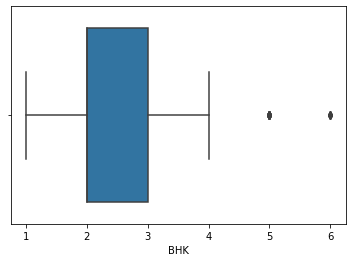

In [7]:
#Fitur BHK
sns.boxplot(x=dataset['BHK'])

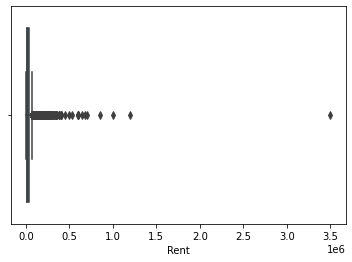

In [8]:
#Fitur Rent
sns.boxplot(x=dataset['Rent'])

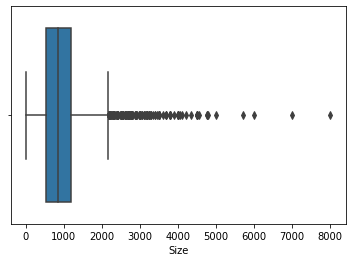

In [9]:
#Fitur Size
sns.boxplot(x=dataset['Size'])

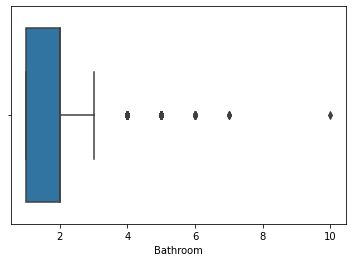

In [10]:
#Fitur Bathroom
sns.boxplot(x=dataset['Bathroom'])

**MEMBUAT IQR**

In [11]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR=Q3-Q1
dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
dataset.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(4131, 10)

**UNIVARIATE ANALYSIS**

In [12]:
dataset['Area Locality']

0                         Bandel
1       Phool Bagan, Kankurgachi
2        Salt Lake City Sector 2
3                    Dumdum Park
4                  South Dum Dum
                  ...           
4741                Bandam Kommu
4742        Manikonda, Hyderabad
4743        Himayath Nagar, NH 7
4744                  Gachibowli
4745             Suchitra Circle
Name: Area Locality, Length: 4131, dtype: object

In [13]:
dataset['Floor']

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4131, dtype: object

In [14]:
dataset['Area Type']

0        Super Area
1        Super Area
2        Super Area
3        Super Area
4       Carpet Area
           ...     
4741    Carpet Area
4742     Super Area
4743    Carpet Area
4744    Carpet Area
4745    Carpet Area
Name: Area Type, Length: 4131, dtype: object

In [15]:
dataset['Furnishing Status']

0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4741    Semi-Furnished
4742    Semi-Furnished
4743    Semi-Furnished
4744    Semi-Furnished
4745       Unfurnished
Name: Furnishing Status, Length: 4131, dtype: object

In [16]:
dataset['Tenant Preferred']

0       Bachelors/Family
1       Bachelors/Family
2       Bachelors/Family
3       Bachelors/Family
4              Bachelors
              ...       
4741    Bachelors/Family
4742    Bachelors/Family
4743    Bachelors/Family
4744              Family
4745           Bachelors
Name: Tenant Preferred, Length: 4131, dtype: object

In [17]:
dataset['City']

0         Kolkata
1         Kolkata
2         Kolkata
3         Kolkata
4         Kolkata
          ...    
4741    Hyderabad
4742    Hyderabad
4743    Hyderabad
4744    Hyderabad
4745    Hyderabad
Name: City, Length: 4131, dtype: object

In [18]:
#Karena hanya coloumn Area Locality dan Floor yang memiliki banyak jenis atau kelompok, sehingga kita drop
dataset = dataset.drop(['Area Locality', 'Floor'], axis = 'columns')

In [19]:
dataset.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [20]:
numerical_features = ['BHK', 'Rent', 'Size', 'Bathroom']
categorical_features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']

**CATEGORICAL FEATURES**

             jumlah sampel   persentase 
Super Area             2330    56.402808
Carpet Area            1799    43.548778
Built Area                2     0.048414


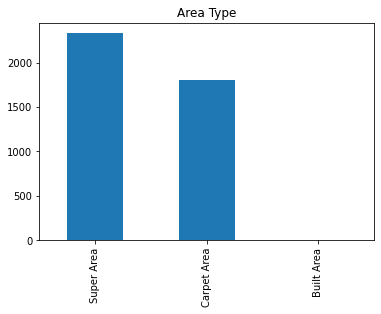

In [21]:
#fitur Area Type
feature = categorical_features[0]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel ': count, 'persentase ':percent})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel   persentase 
Bangalore             840    20.334060
Chennai               831    20.116195
Hyderabad             804    19.462600
Mumbai                602    14.572743
Delhi                 538    13.023481
Kolkata               516    12.490922


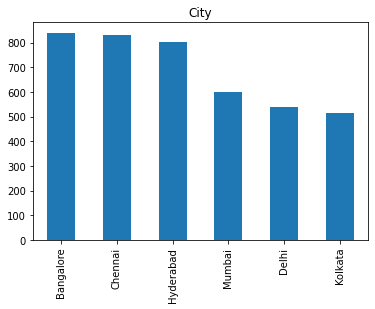

In [22]:
#fitur City
feature = categorical_features[1]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel ': count, 'persentase ':percent})
print(df)
count.plot(kind='bar', title=feature);

                jumlah sampel   persentase 
Semi-Furnished            1931    46.744130
Unfurnished               1698    41.103849
Furnished                  502    12.152021


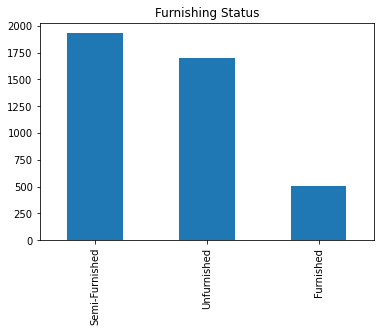

In [23]:
#fitur Furnishing Status
feature = categorical_features[2]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel ': count, 'persentase ':percent})
print(df)
count.plot(kind='bar', title=feature);

                  jumlah sampel   persentase 
Bachelors/Family            3055    73.953038
Bachelors                    707    17.114500
Family                       369     8.932462


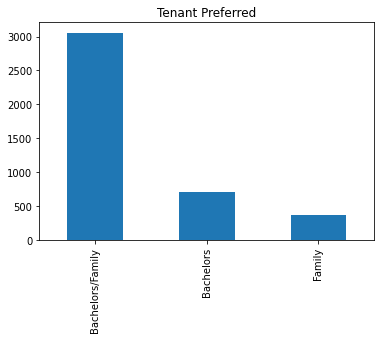

In [24]:
#fitur Tenant Preferred
feature = categorical_features[3]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel ': count, 'persentase ':percent})
print(df)
count.plot(kind='bar', title=feature);

**NUMERICAL FEATURES**

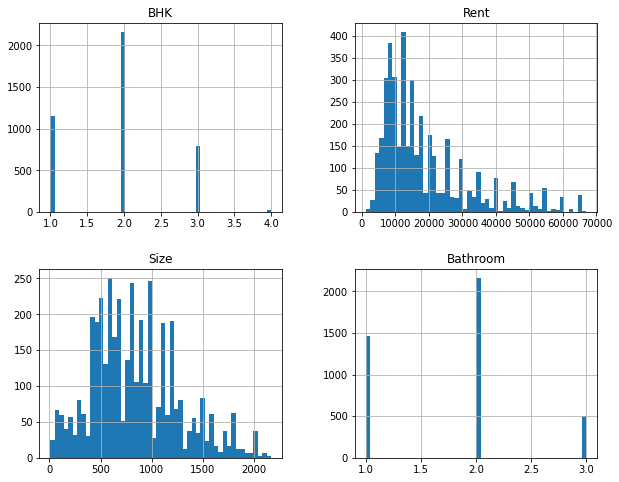

In [25]:
dataset.hist(bins=50, figsize=(10,8))
plt.show()

**MULTIVARIATE ANALYSIS**

**CATEGORICAL FEATURES**

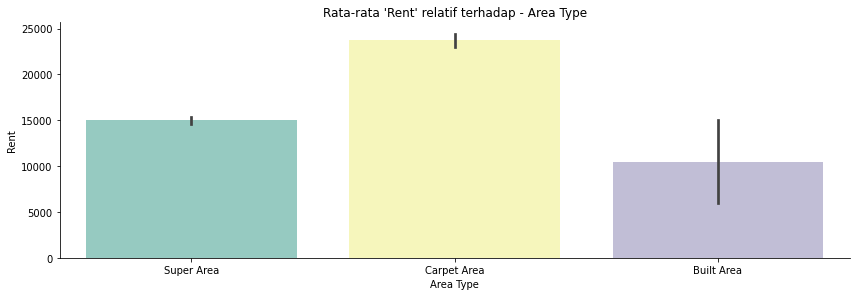

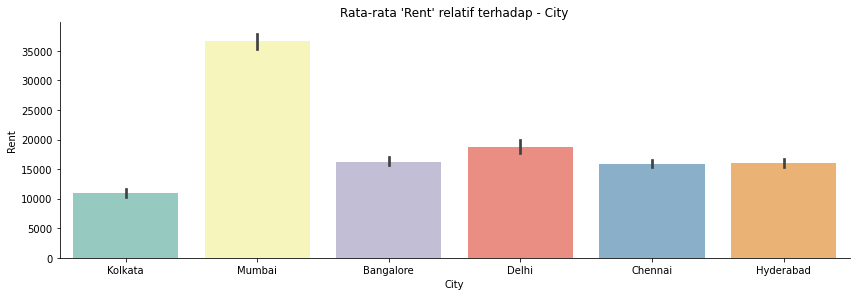

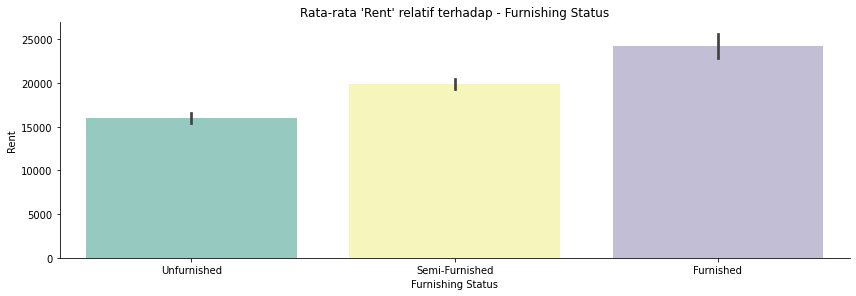

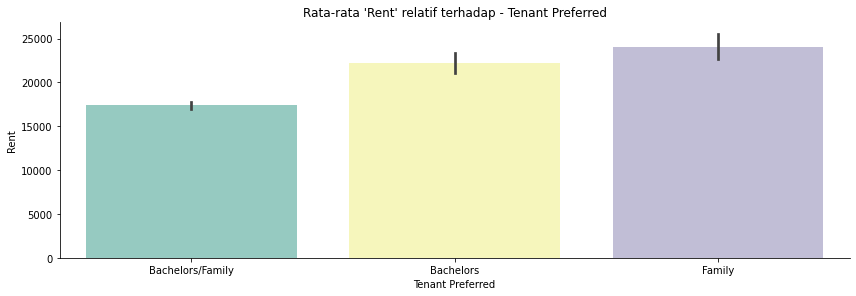

In [26]:
cat_features = dataset.select_dtypes('object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='Rent', kind='bar', dodge=False, height=4, aspect=3, data=dataset, palette='Set3')
  plt.title("Rata-rata 'Rent' relatif terhadap - {}".format(col))

**NUMERICAL FEATURES**

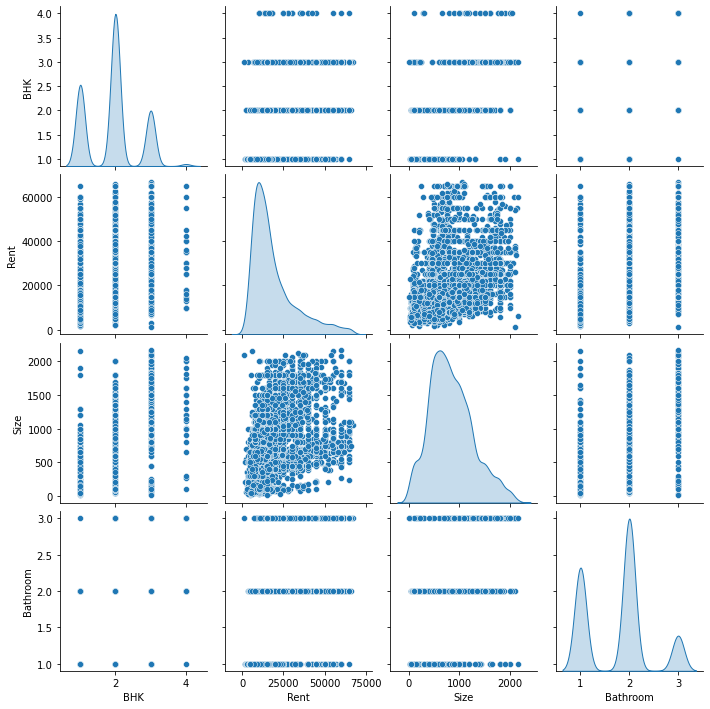

In [27]:
#Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(dataset, diag_kind='kde')

**MENGEVALUASI SKOR KORELASINYA**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

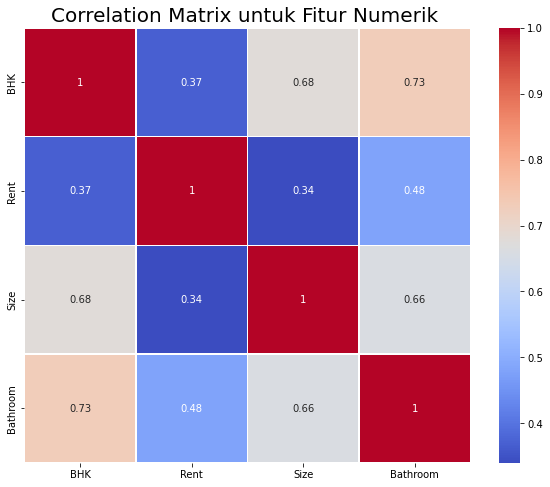

In [28]:
plt.figure(figsize=(10,8))
correlation_matrix = dataset.corr().round(2)

#untuk mengeprint nilai didalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix untuk Fitur Numerik ', size=20)

# **DATA PREPARATION**

In [29]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Area Type'], prefix='Area Type')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['City'], prefix='City')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Furnishing Status'], prefix='Furnishing Status')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Tenant Preferred'], prefix='Tenant Preferred')], axis=1)

dataset.drop(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'], axis=1, inplace=True)
dataset.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,2,20000,800,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,17000,1000,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3,2,10000,800,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,2,7500,850,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0


**TRAIN TEST SPLIT**

In [30]:
X = dataset.drop(['Rent'], axis=1)
y = dataset['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [31]:
#mengecek jumlah sampel
print(f'Total # of sample in whole dataset : {len(X)}')
print(f'Total # of sample in train : {len(X_train)}')
print(f'Total # of sample in test : {len(X_test)}')

Total # of sample in whole dataset : 4131
Total # of sample in train : 3717
Total # of sample in test : 414


**STANDARISASI**

In [32]:
numerical_features = ['BHK', 'Size', 'Bathroom']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,BHK,Size,Bathroom
3497,1.533581,2.214832,1.895994
4369,1.533581,2.015573,1.895994
3867,0.103854,-0.211436,0.358936
3417,0.103854,-0.094225,0.358936
4745,0.103854,0.374619,0.358936


In [33]:
X_train[numerical_features].describe().round(5)

,BHK,Size,Bathroom
count,3717.00000,3717.00000,3717.00000
mean,0.00000,0.00000,0.00000
std,1.00013,1.00013,1.00013
min,-1.32587,-1.94616,-1.17812
25%,-1.32587,-0.79749,-1.17812
50%,0.10385,-0.09423,0.35894
75%,0.10385,0.60904,0.35894
max,2.96331,3.11736,1.89599


# **MODEL DEVELOPMENT**

In [34]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

**KNN**

In [35]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

**RANDOM FOREST**

In [36]:
#buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train),y_true=y_train)

**BOOSTING**

In [37]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# **EVALUASI MODEL**

In [38]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [39]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,50443.579012,73799.113426
RF,16389.55196,71759.24995
Boosting,65459.316039,79392.044726


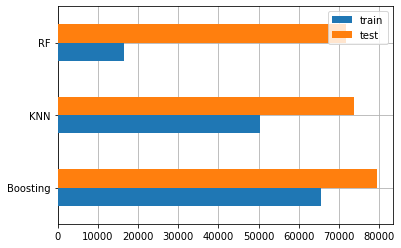

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [41]:
#Untuk mengujinya, membuat prediksi menggunakan beberapa harga dari data test.
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
3255,15000,12600.0,15226.0,16835.1
